In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('hul.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')


In [3]:
features = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']
target = 'Close'

In [4]:
sequence_length = 100

In [5]:
data['Date']

0      1996-01-01
1      1996-01-02
2      1996-01-03
3      1996-01-04
4      1996-01-05
          ...    
7176   2024-07-26
7177   2024-07-29
7178   2024-07-30
7179   2024-07-31
7180   2024-08-01
Name: Date, Length: 7181, dtype: datetime64[ns]

In [6]:
X = []
y = []

for i in range(len(data) - sequence_length):
    X.append(data[features].iloc[i:i+sequence_length].values)
    y.append(data[target].iloc[i+sequence_length])

In [7]:
X = np.array(X)
y = np.array(y).reshape(-1, 1)

In [8]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)
y_scaled = scaler_y.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [10]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, len(features)), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1)
])

c:\Users\ghrua\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - loss: 0.0256 - val_loss: 3.1812e-04
Epoch 2/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - loss: 2.1328e-04 - val_loss: 2.0653e-04
Epoch 3/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - loss: 1.7538e-04 - val_loss: 1.8708e-04
Epoch 4/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - loss: 1.5692e-04 - val_loss: 1.7889e-04
Epoch 5/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - loss: 1.4845e-04 - val_loss: 2.5214e-04
Epoch 6/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - loss: 1.7011e-04 - val_loss: 1.7981e-04
Epoch 7/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - loss: 1.5258e-04 - val_loss: 1.5338e-04
Epoch 8/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - loss: 1.5288e-04 - val_loss: 1.6743e-04
Epoch 9/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - loss: 1.3738e-04 - val_loss: 4.8763e-04
Epoch 10/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - loss: 1.9155e-04 - val_loss: 1.4857e-04
Epoch 11/50
142/142 ━━━━━━━━━━━━━

In [13]:
y_pred_scaled = model.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_scaled)

222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


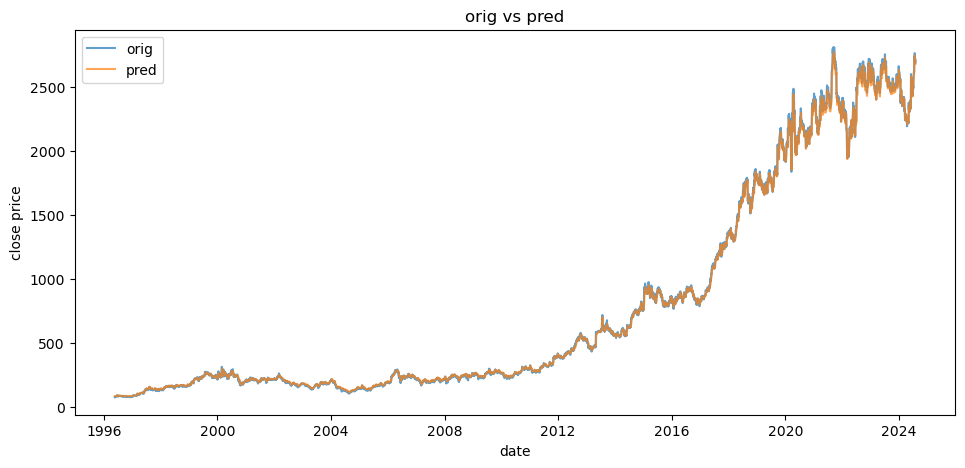

In [24]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.plot(data['Date'].iloc[sequence_length:], y_actual, label='orig', alpha=0.7)
plt.plot(data['Date'].iloc[sequence_length:], y_pred, label='pred', alpha=0.7)
plt.title('orig vs pred')
plt.xlabel('date')
plt.ylabel('close price')
plt.legend()


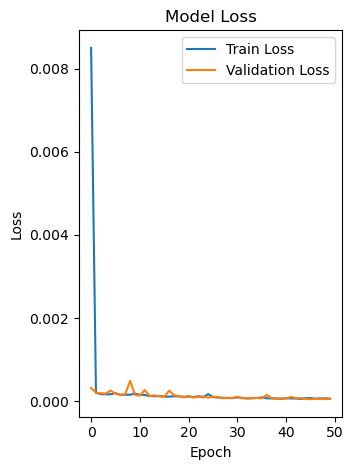

In [22]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 64)        │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,413 (364.90 KB)

 Trainable params: 31,137 (121.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,276 (243.27 KB)